In [1]:
import sys
sys.path.insert(0, '../../scripts/')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import required packages
import pandas as pd
import numpy as np
from PIL import Image

# preprocess
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# plots
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# local scripts
from text_utils import preprocess_corpus, untokenize_document

In [3]:
# read the dataset into a dataframe
df = pd.read_csv('../../data/cyberbullying_tweets.csv')

# dataset shape: (rows, columns)
display(df.shape)

# first 5 datapoints
df.head()

(47692, 2)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64
tweet_text            0
cyberbullying_type    0
dtype: int64


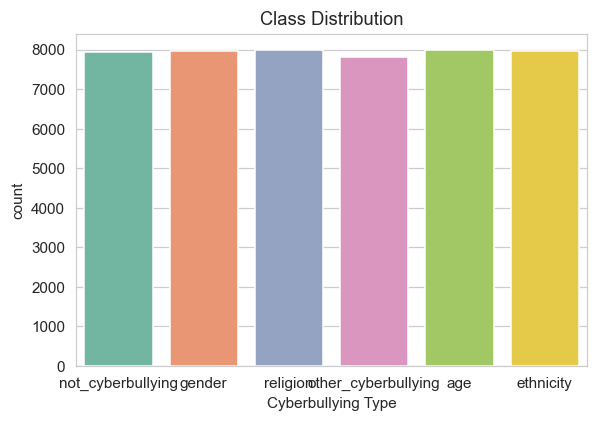

In [4]:
# class distribution
print(df['cyberbullying_type'].value_counts())

# check null value counts
print(df.isnull().sum())

# plot the class distribution
plt.figure(dpi=110)
chart = sns.countplot(x="cyberbullying_type", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Cyberbullying Type')
plt.show()

In [5]:
# split into train-validation-test sets (60-20-20)
# perform a random split

# train-test split (80-20)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# train-validation split (80-20)
# 0.8 * 0.25 = 0.2
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=42)

# rest index
df_train.reset_index()
df_valid.reset_index()
df_test.reset_index()

# size of train-validation-test sets
print('train:',df_train.shape[0])
print('valid:',df_valid.shape[0])
print('test:',df_test.shape[0])

# save validation set
df_valid.to_csv('../../data/valid_data.csv', index=False)

# save test set
df_test.to_csv('../../data/test_data.csv', index=False)

train: 28614
valid: 9539
test: 9539


In [6]:
# preprocess the tweet_text column
df_train['clean_tweet'] = preprocess_corpus(df['tweet_text'])

# construct clean train set
df_train_clean = df_train.loc[:,['clean_tweet', 'cyberbullying_type']]

# save the clean train set
df_train_clean.to_csv('../../data/train_data.csv', index=False)

# first 5 cleaned datapoints
df_train_clean.head()

,clean_tweet,cyberbullying_type
36167,hate ppl high school used bully hot omg love m...,age
6828,kat andre asshole omg mkr,not_cyberbullying
33349,new access trading cause need high level opini...,age
45739,fuck david duke racist think america belong du...,ethnicity
28246,may say lot hate apologetic army hope choke ev...,other_cyberbullying


## WordCloud: Not cyberbullying tweets
----

In [7]:
# load all the english stopwords
stop_words = stopwords.words('english')

# total stopwords
print(len(stop_words))

# first 10 stopwords
stop_words[:10]

179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

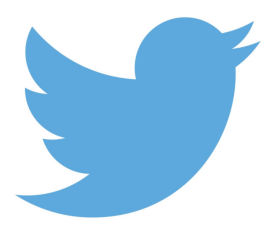

In [8]:
# create a mask for wordcloud
twitter_mask = np.array(Image.open('../../images/logo1.png'))
plt.axis('off')
plt.imshow(twitter_mask)
plt.show()

# colormap for wordcloud
colormap = 'Set2'

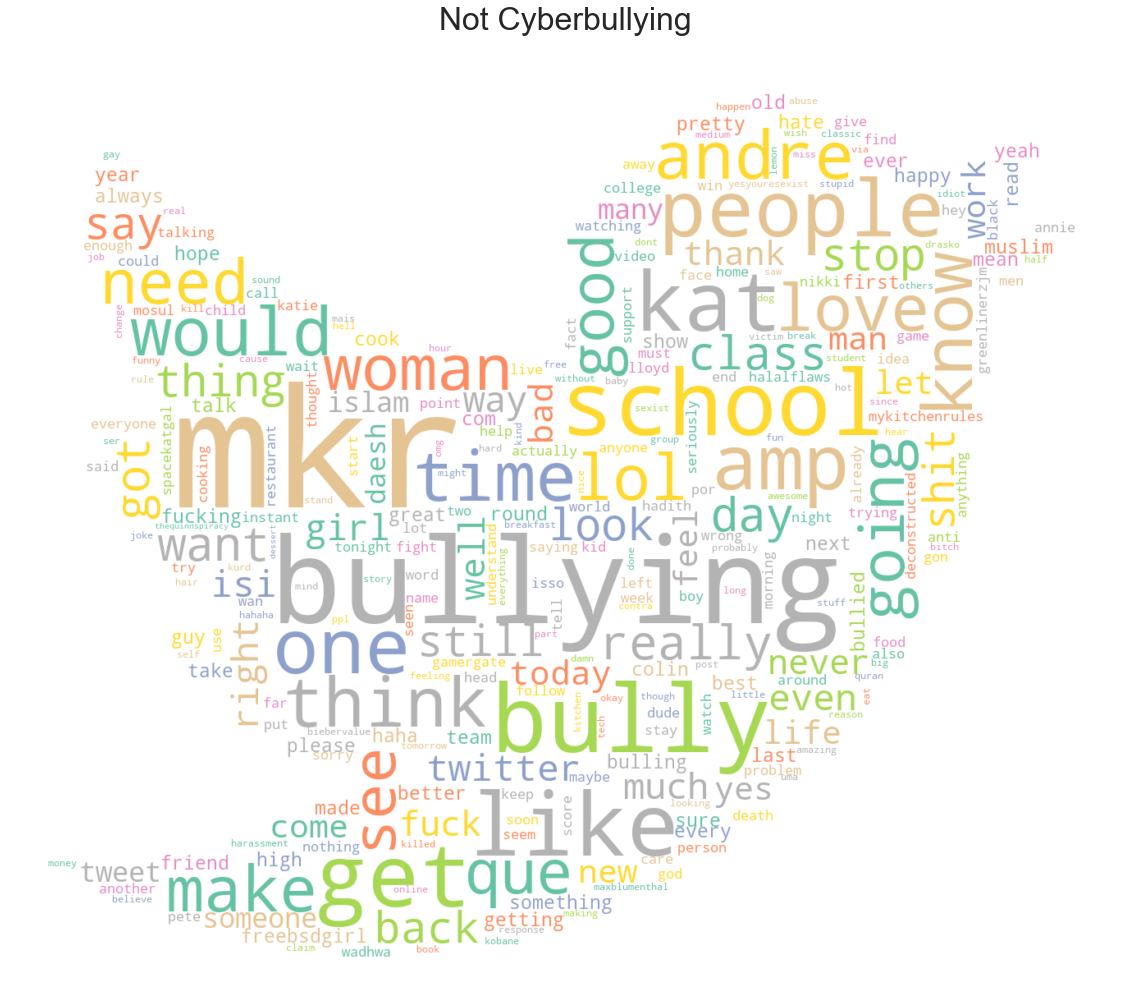

In [9]:
# wordcloud for not_cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'not_cyberbullying'].clean_tweet)))

plt.axis('off')
plt.title('Not Cyberbullying', fontsize=32, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig("../../images/wordcloud-not-cyberbullying.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: All cyberbullying tweets
----

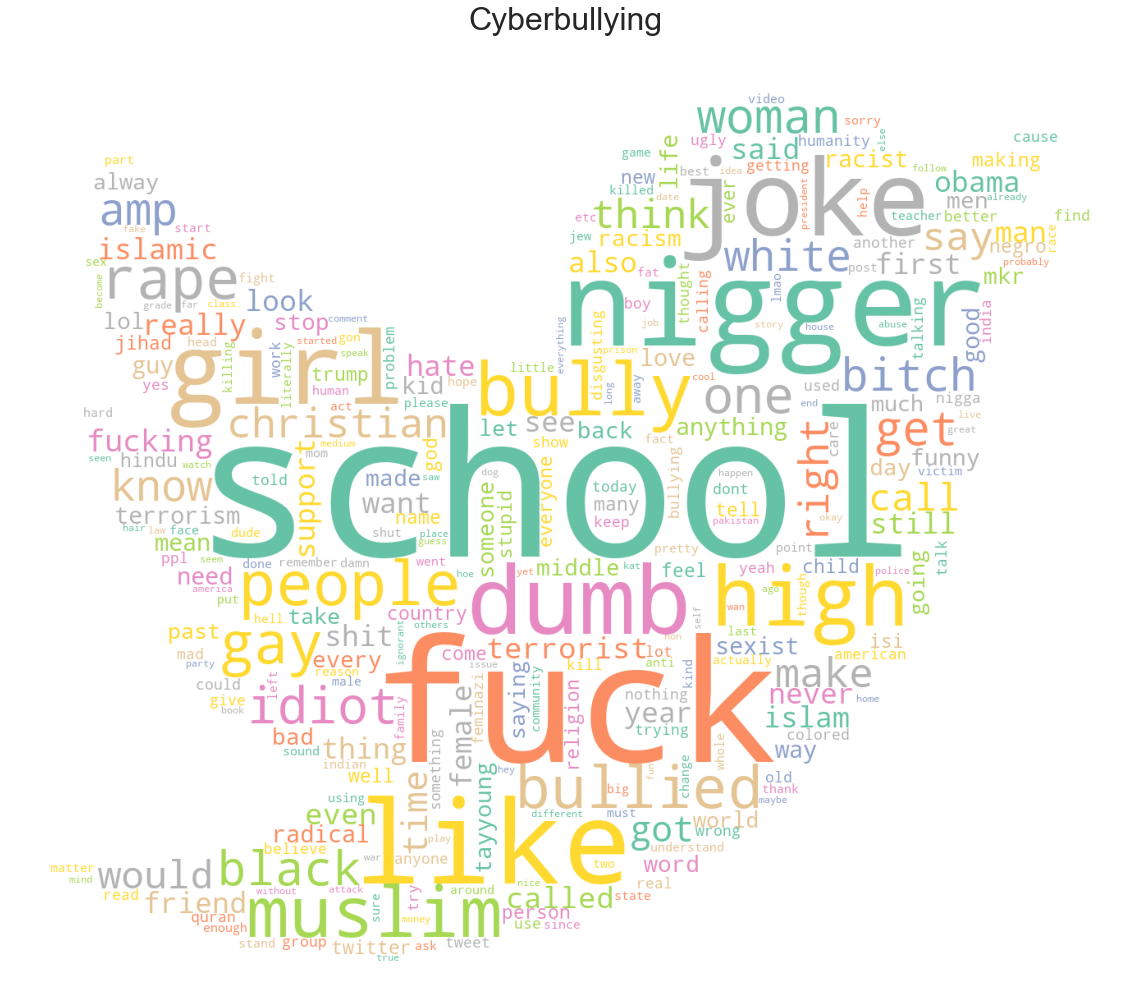

In [10]:
# wordcloud for all cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] != 'not_cyberbullying'].clean_tweet)))

plt.axis('off')
plt.title('Cyberbullying', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../../images/wordcloud-cyberbullying.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Age cyberbullying tweets
----

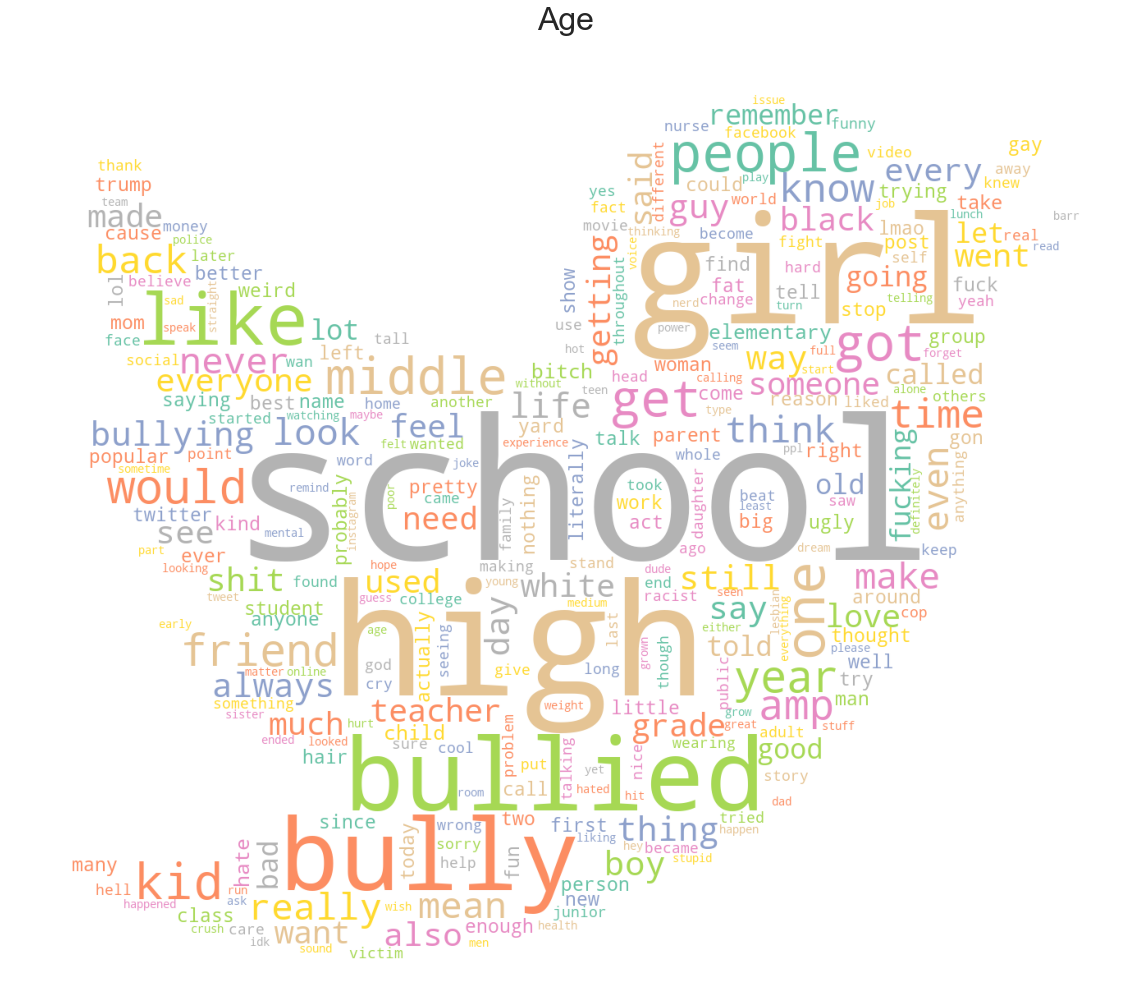

In [11]:
# wordcloud for age cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'age'].clean_tweet)))

plt.axis('off')
plt.title('Age', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../../images/wordcloud-age.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Ethnicity cyberbullying tweets
----

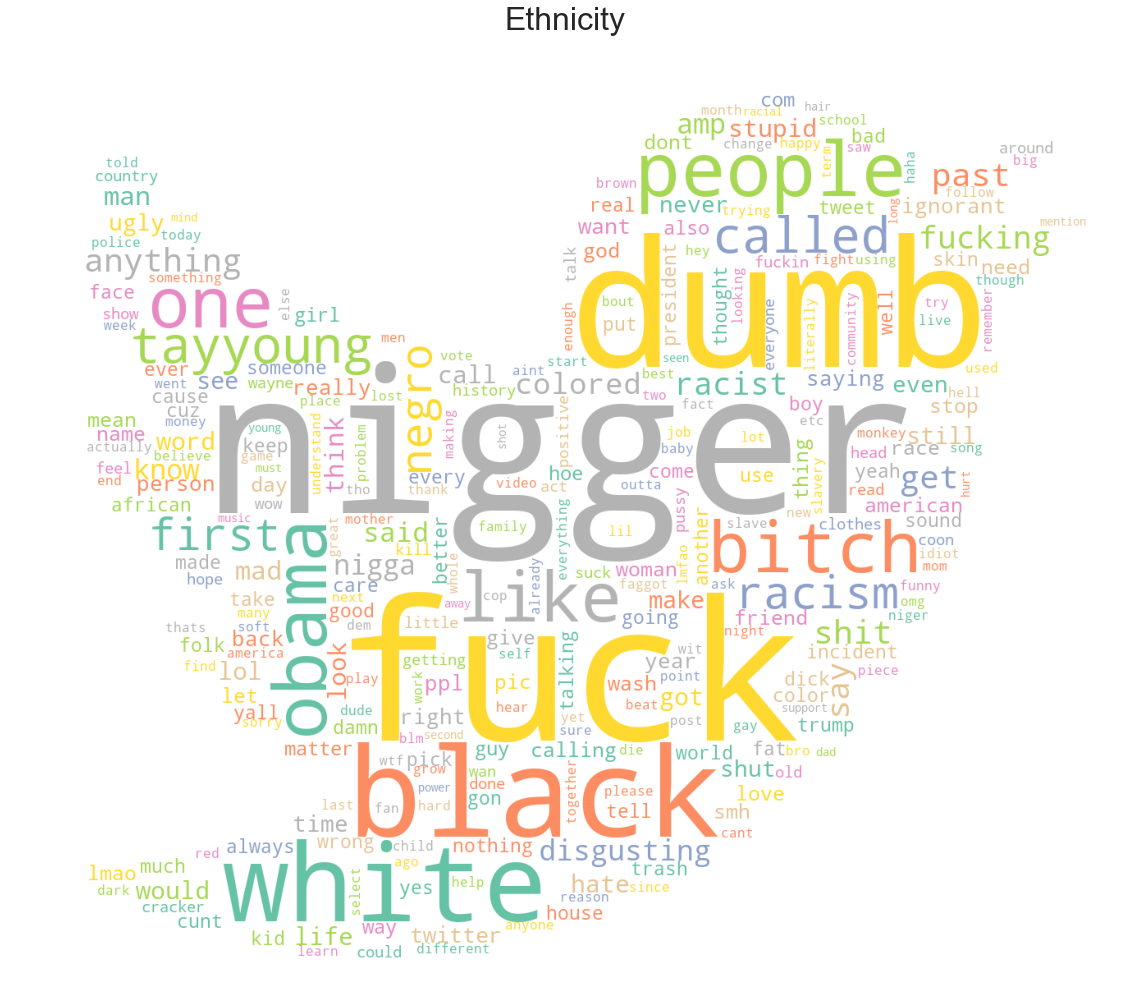

In [12]:
# wordcloud for ethnicity cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'ethnicity'].clean_tweet)))

plt.axis('off')
plt.title('Ethnicity', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../../images/wordcloud-ethnicity.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Gender cyberbullying tweets
----

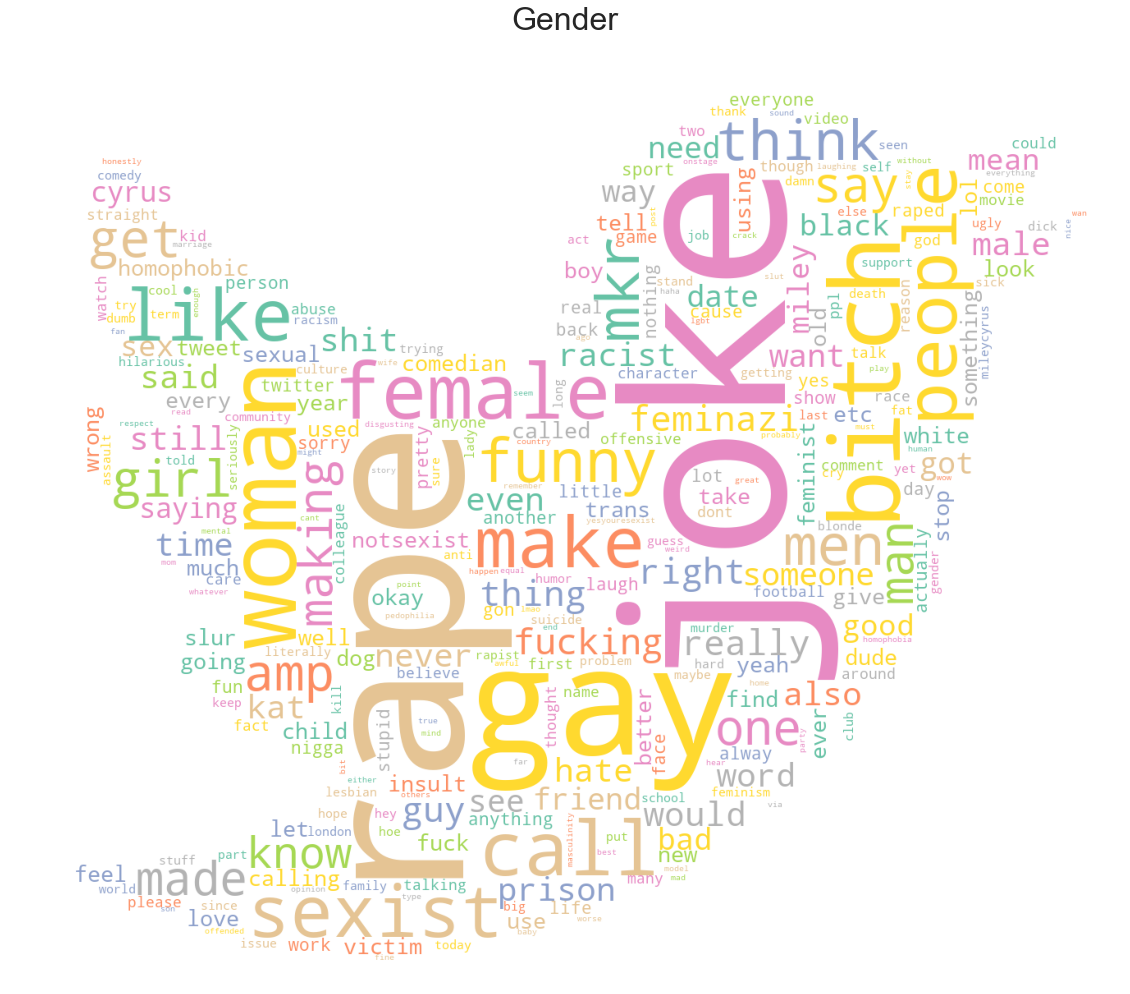

In [13]:
# wordcloud for gender cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'gender'].clean_tweet)))

plt.axis('off')
plt.title('Gender', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../../images/wordcloud-gender.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Religion cyberbullying tweets
----

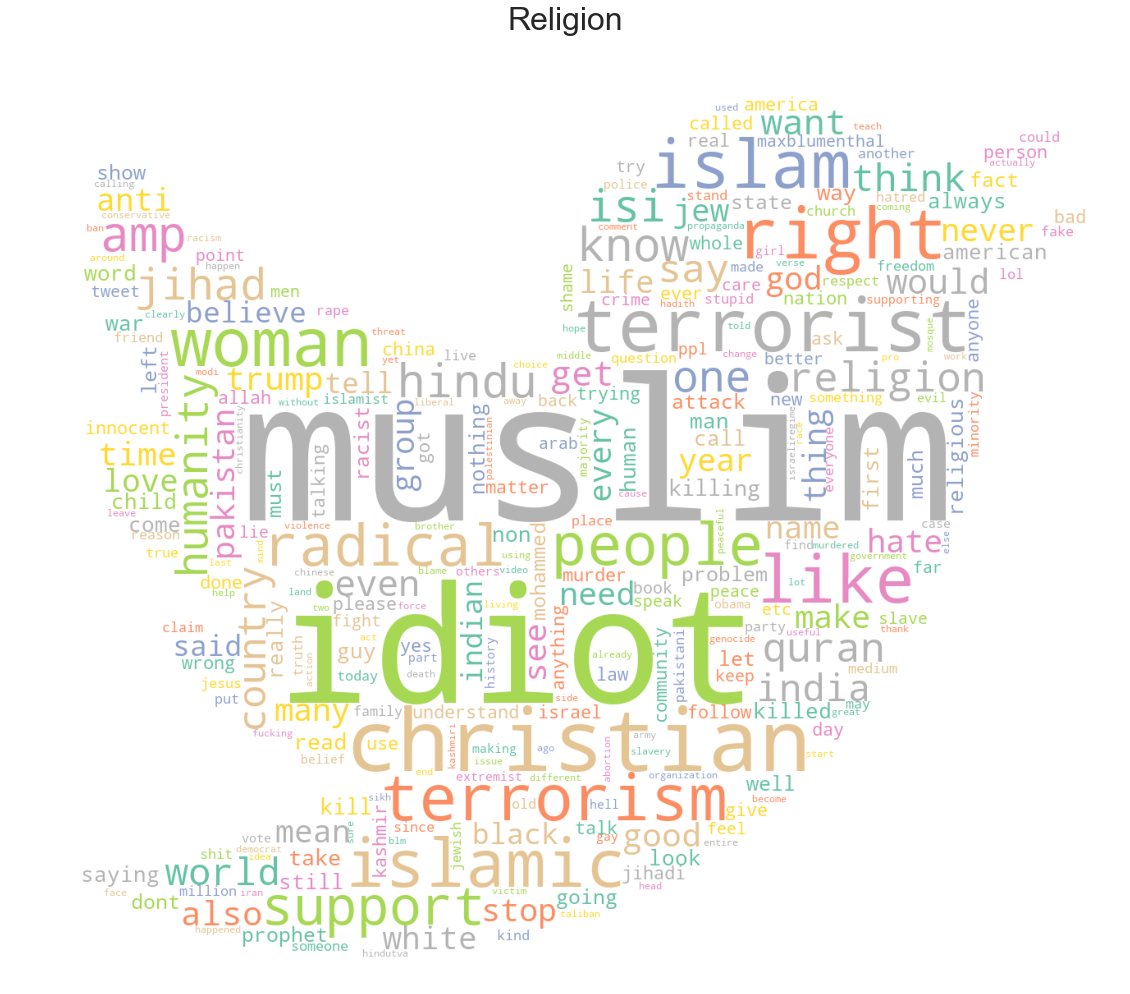

In [14]:
# wordcloud for religion cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'religion'].clean_tweet)))

plt.axis('off')
plt.title('Religion', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../../images/wordcloud-religion.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Other cyberbullying tweets
----

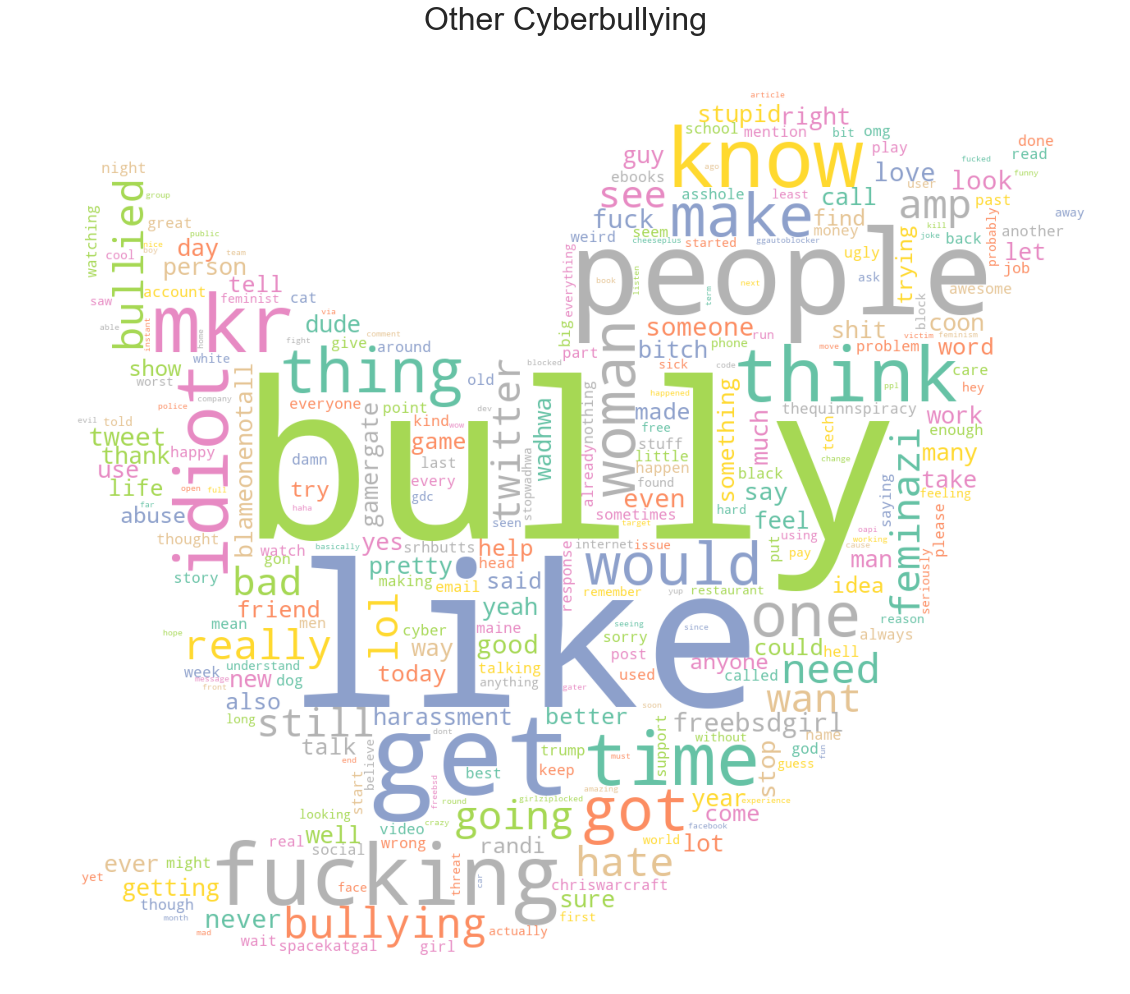

In [15]:
# wordcloud for other cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'other_cyberbullying'].clean_tweet)))

plt.axis('off')
plt.title('Other Cyberbullying', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../../images/wordcloud-other-cyberbullying.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()